# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
from datetime import date
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Code found https://www.programiz.com/python-programming/datetime/current-datetime
# Finding current date for later plots.
today = date.today()
curr_date = today.strftime("%b-%d-%Y")

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set empty lists to hold characters height and mass
new_cities = []
latitudes = []
longitudes = []
max_temps = []
humidity = []
cloudiness = []
wind_speeds = []
countries = []
dates = []

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'

output_file = "C://Python-API-Challenge/WeatherPy/Output_Data/city_log.txt"

with open(output_file, "w") as datafile:

    # Loop through each city
    for city in cities:
    
        # Create search query, make request and store in json
        query = f"{url}appid={weather_api_key}&q={city}&units={units}"
        response = requests.get(query)
        response_json = response.json()
    
        # Try to grab the height and mass of characters if they are available in the Star Wars API
        try:
        
            latitudes.append(response_json['coord']['lat'])
            longitudes.append(response_json['coord']['lon'])
            max_temps.append(response_json['main']['temp_max'])
            humidity.append(response_json['main']['humidity'])
            cloudiness.append(response_json['clouds']['all'])
            wind_speeds.append(response_json['wind']['speed'])
            countries.append(response_json['sys']['country'])
            dates.append(response_json['dt'])
            city_id = response_json['id']
            new_cities.append(city)
        
            datafile.write(f"City ID: {city_id}\n")
            datafile.write(f"City Name: {city}\n\n")
        
            print(f"{city_id} {city} was found\n")
        
        # Handle exceptions for a character that is not available in the Star Wars API
        except KeyError:
        
            datafile.write(f"{city} not found\n\n")
            print(f"{city} not found\n")
            continue

    datafile.write(f"Number of cities found: {len(new_cities)}")
    print(f"Number of cities found: {len(new_cities)}")

6165406 thompson was found

3833367 ushuaia was found

5282297 bethel was found

2075265 busselton was found

3369157 cape town was found

5848280 kapaa was found

2071860 esperance was found

1002145 george was found

6201424 mataura was found

1819729 victoria was found

5106841 albany was found

550512 kharovsk was found

1786855 yatou was found

935214 saint-pierre was found

1714733 dingle was found

3408424 ipixuna was found

1657818 champasak was found

3831208 qaanaaq was found

546105 nikolskoye was found

1514792 gazojak was found

5807540 pullman was found

2163355 hobart was found

3372964 lagoa was found

5367788 lompoc was found

5122534 jamestown was found

1280957 jiayuguan was found

986717 kruisfontein was found

5983720 iqaluit was found

5855927 hilo was found

3366880 hermanus was found

6167817 torbay was found

kerteh not found

1735106 georgetown was found

2084442 vanimo was found

5975034 high prairie was found

933995 souillac was found

4030556 rikitea was f

134602 fereydun kenar was found

1519275 shar was found

1490256 talnakh was found

2023324 kadaya was found

5870133 nome was found

3374333 praia was found

1248749 dambulla was found

359792 aswan was found

463355 zheleznodorozhnyy was found

1638352 lasem was found

2172797 cairns was found

3899695 ancud was found

2078025 adelaide was found

893485 chiredzi was found

1848976 wajima was found

1735634 kuching was found

2094342 kavieng was found

3984997 san quintin was found

1106643 quatre cocos was found

2517750 felanitx was found

6014443 lac du bonnet was found

3374462 mindelo was found

1214488 meulaboh was found

2757220 den helder was found

3136765 stjordalshalsen was found

300640 sirnak was found

5725846 eugene was found

3466470 centenario do sul was found

1244926 hambantota was found

warqla not found

5563397 eureka was found

5820705 casper was found

2294915 takoradi was found

1650434 bambanglipuro was found

1521230 makinsk was found

1180729 dalbandin was 

158321 karema was found

ust-kamchatsk not found

babanusah not found

3129839 aras was found

1591474 bac lieu was found

1731461 alim was found

2249281 linguere was found

Number of cities found: 555


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_dict = {
    "City": new_cities,
    "Lat": latitudes,
    "Lng": longitudes,
    "Max Temp" : max_temps,
    "Humidity" : humidity,
    "Cloudiness" : cloudiness,
    "Wind Speed" : wind_speeds,
    "Country" : countries,
    "Date" : dates
}
weather_data = pd.DataFrame(weather_dict)

# Code for writing city data to csv found https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html

weather_data.to_csv(path_or_buf = "C://Python-API-Challenge/WeatherPy/Output_Data/new_cities.csv", index = False)

weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.74,-97.86,10.40,92,90,9.17,CA,1609626614
1,ushuaia,-54.80,-68.30,55.40,66,40,21.92,AR,1609626685
2,bethel,41.37,-73.41,42.80,60,1,4.70,US,1609626724
3,busselton,-33.65,115.33,62.01,68,93,5.99,AU,1609626708
4,cape town,-33.93,18.42,69.80,60,0,21.92,ZA,1609626592


In [5]:
weather_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,555.000000,555.000000,555.000000,555.000000,555.000000,555.000000,5.550000e+02
mean,19.754829,19.727982,49.975009,75.463063,54.630631,7.899622,1.609627e+09
std,33.261153,89.684431,31.792346,18.566982,39.339797,5.638690,2.195287e+02
min,-54.800000,-175.200000,-49.110000,13.000000,0.000000,0.090000,1.609626e+09
25%,-7.280000,-56.770000,33.010000,69.000000,14.000000,3.580000,1.609627e+09
50%,22.080000,22.460000,61.000000,80.000000,63.000000,6.930000,1.609627e+09
75%,47.115000,100.120000,76.965000,87.000000,93.000000,10.290000,1.609627e+09
max,78.220000,179.320000,91.400000,100.000000,100.000000,36.130000,1.609627e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
bad_humid = weather_data.loc[weather_data['Humidity'] > 100].index.to_list()
weather_data = weather_data.drop(index )

[]

In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

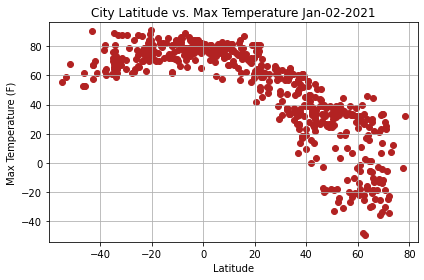

In [6]:
city_lats = weather_data['Lat']
city_max_temps = weather_data['Max Temp']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_max_temps, marker='o', facecolors='firebrick')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_max_temps)-5, max(city_max_temps)+5)

plt.grid()

output_image = f'Output_Data/LatvTemp_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Humidity Plot

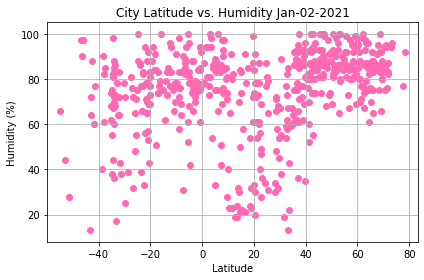

In [7]:
city_humid = weather_data['Humidity']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_humid, marker='o', facecolors='hotpink')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_humid)-5, max(city_humid)+5)

plt.grid()

output_image = f'Output_Data/LatvHumid_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Cloudiness Plot

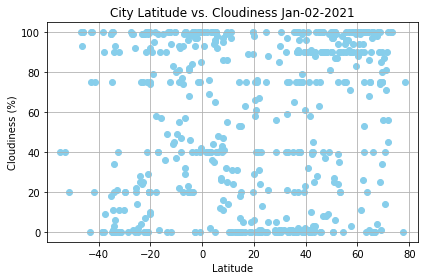

In [8]:
city_clouds = weather_data['Cloudiness']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_clouds, marker='o', facecolors='skyblue')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_clouds)-5, max(city_clouds)+5)

plt.grid()

output_image = f'Output_Data/LatvClouds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Latitude vs. Wind Speed Plot

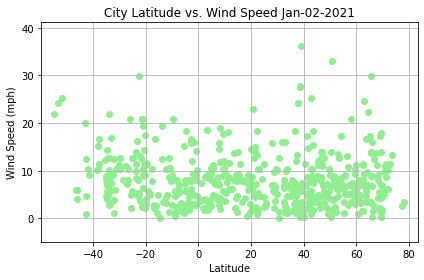

In [9]:
city_winds = weather_data['Wind Speed']

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(city_lats, city_winds, marker='o', facecolors='lightgreen')

# Titled the graph and gave labels to the x and y axes.

plt.title(f'City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(city_lats)-5, max(city_lats)+5)
plt.ylim(min(city_winds)-5, max(city_winds)+5)

plt.grid()

output_image = f'Output_Data/LatvWinds_plot_{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

## Linear Regression

In [10]:
north_hem_weather = weather_data.loc[weather_data['Lat'] >= 0]
south_hem_weather = weather_data.loc[weather_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8316171603310388


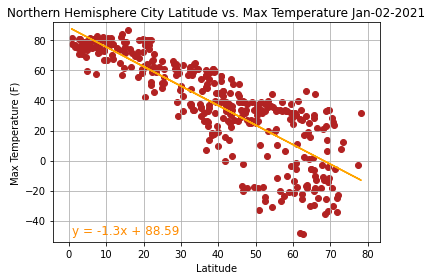

In [11]:
north_city_lats = north_hem_weather['Lat']
north_max_temps = north_hem_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_max_temps)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_max_temps, marker='o', facecolors='firebrick')
plt.plot(north_city_lats, regress_values, "r-", color='orange')
plt.annotate(line_string, (min(north_city_lats), min(north_max_temps)), fontsize=12, color="darkorange")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_max_temps)-5, max(north_max_temps)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5367551917341918


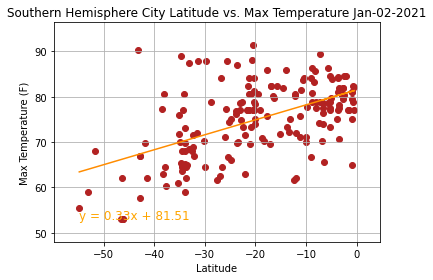

In [12]:
south_city_lats = south_hem_weather['Lat']
south_max_temps = south_hem_weather['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_max_temps)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_max_temps, marker='o', facecolors='firebrick')
plt.plot(south_city_lats, regress_values, "r-", color='darkorange')
plt.annotate(line_string,(min(south_city_lats), min(south_max_temps)), fontsize=12, color="orange")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_max_temps)-5, max(south_max_temps)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvTemp_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.367193151271818


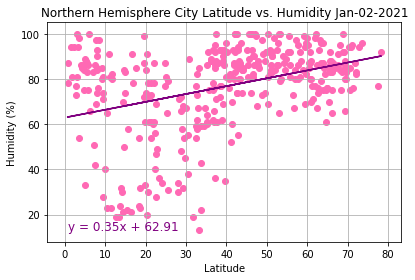

In [13]:
north_humid = north_hem_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_humid)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_humid, marker='o', facecolors='hotpink')
plt.plot(north_city_lats, regress_values, "r-", color='purple')
plt.annotate(line_string, (min(north_city_lats), min(north_humid)), fontsize=12, color="purple")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_humid)-5, max(north_humid)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2732560168040974


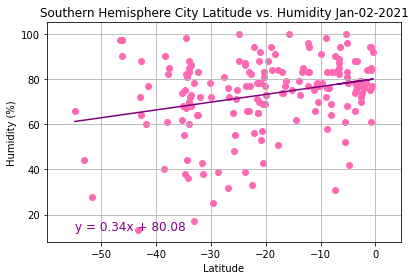

In [14]:
south_humid = south_hem_weather['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_humid)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_humid, marker='o', facecolors='hotpink')
plt.plot(south_city_lats, regress_values, "r-", color='purple')
plt.annotate(line_string, (min(south_city_lats), min(south_humid)), fontsize=12, color="purple")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Humidity {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_humid)-5, max(south_humid)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvHumid_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23720668813931123


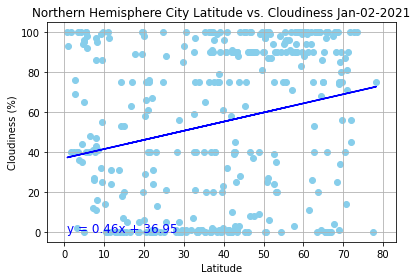

In [15]:
north_clouds = north_hem_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_clouds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_clouds, marker='o', facecolors='skyblue')
plt.plot(north_city_lats, regress_values, "r-", color='blue')
plt.annotate(line_string, (min(north_city_lats), min(north_clouds)), fontsize=12, color="blue")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_clouds)-5, max(north_clouds)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.2424743571723746


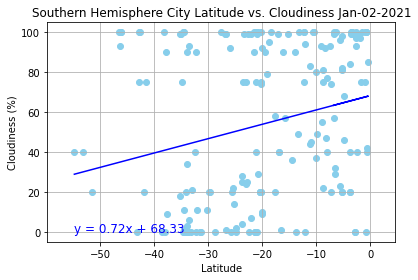

In [16]:
south_clouds = south_hem_weather['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_clouds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_clouds, marker='o', facecolors='skyblue')
plt.plot(south_city_lats, regress_values, "r-", color='blue')
plt.annotate(line_string, (min(south_city_lats), min(south_clouds)), fontsize=12, color="blue")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_clouds)-5, max(south_clouds)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvClouds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.02246722810269228


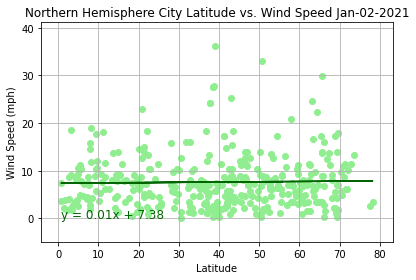

In [17]:
north_winds = north_hem_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(north_city_lats, north_winds)
regress_values = north_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(north_city_lats, north_winds, marker='o', facecolors='lightgreen')
plt.plot(north_city_lats, regress_values, "r-", color='darkgreen')
plt.annotate(line_string, (min(north_city_lats), min(north_winds)), fontsize=12, color="darkgreen")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(north_city_lats)-5, max(north_city_lats)+5)
plt.ylim(min(north_winds)-5, max(north_winds)+5)

plt.grid()

output_image = f'Output_Data/NorthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.29379448715570095


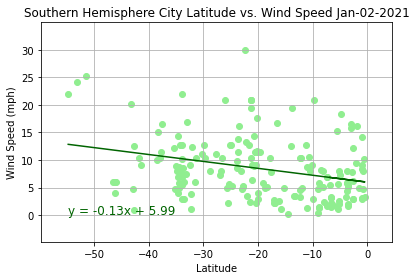

In [18]:
south_winds = south_hem_weather['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(south_city_lats, south_winds)
regress_values = south_city_lats * slope + intercept
line_string = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The r-value is: {rvalue}")

# Plotted the tumor volume by mouse weight into a scatter plot.

plt.scatter(south_city_lats, south_winds, marker='o', facecolors='lightgreen')
plt.plot(south_city_lats, regress_values, "r-", color='darkgreen')
plt.annotate(line_string, (min(south_city_lats), min(south_winds)), fontsize=12, color="darkgreen")

# Titled the graph and gave labels to the x and y axes.

plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed {curr_date}')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# Set a limit to the x and y axes based on the data.  Added a grid to the graph to be more readable.

plt.xlim(min(south_city_lats)-5, max(south_city_lats)+5)
plt.ylim(min(south_winds)-5, max(south_winds)+5)

plt.grid()

output_image = f'Output_Data/SouthHem_LatvWinds_plot_w_regression{curr_date}.png'
plt.tight_layout()
plt.savefig(output_image)

plt.show()